In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
print('numpy     :', np.__version__)
print('pandas    :', pd.__version__)
print('tensorflow:', tf.__version__)

from preprocess import GenerateXY
from evaluate import *

numpy     : 1.20.3
pandas    : 1.3.4
tensorflow: 2.8.0


In [2]:
df = pd.read_csv('BTCUSDT-1h.csv', index_col=0)
df

,open,high,low,close,volume
date,,,,,
2017-08-18 00:00:00,4285.08,4340.62,4228.76,4286.53,337549.35
2017-08-18 01:00:00,4286.53,4286.53,4134.61,4243.59,304223.23
2017-08-18 02:00:00,4243.59,4298.64,4234.00,4267.59,230478.63
2017-08-18 03:00:00,4267.59,4308.70,4234.00,4292.39,271281.60
2017-08-18 04:00:00,4292.39,4292.39,4234.43,4287.92,216069.15
...,...,...,...,...,...
2022-03-08 20:00:00,38764.87,38897.68,38434.22,38512.51,70243606.77
2022-03-08 21:00:00,38512.50,38586.15,38388.73,38494.34,38326461.51
2022-03-08 22:00:00,38494.34,38642.74,38472.61,38552.29,18659067.41


In [3]:
cut1 = int(0.6*len(df))
cut2 = int(0.8*len(df))
df_train = df.iloc[:cut1]
df_val = df.iloc[cut1:cut2]
# df_test = df.iloc[cut2:]
df_test = df.iloc[cut2:]
t = 8

x_train, y_train = GenerateXY(df_train, t=t).generate_xy()
x_val, y_val = GenerateXY(df_val, t=t).generate_xy()
x_test, y_test = GenerateXY(df_test, t=t).generate_xy()

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_val  : ', x_val.shape)
print('y_val  : ', y_val.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

In [4]:
# np.save('x_train.npy', x_train)
# np.save('y_train.npy', y_train)
# np.save('x_val.npy', x_val)
# np.save('y_val.npy', y_val)
# np.save('x_train.npy', x_train)
# np.save('x_test.npy', x_test)
# x_train = np.load('x_train.npy')
# y_train = np.load('y_train.npy')
# x_val = np.load('x_val.npy')
# y_val = np.load('y_val.npy')
# x_train = np.load('x_train.npy')
# x_test = np.load('x_test.npy')

In [5]:
batch_size = 128
shape = (32,32,1)
model = keras.Sequential([
    keras.layers.Conv2D(6, 5),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.ReLU(),
    keras.layers.Conv2D(16, 5),
    keras.layers.MaxPooling2D(pool_size=2, strides=2),
    keras.layers.ReLU(),
    keras.layers.Conv2D(120, 5),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
#     keras.layers.Dropout(0.25),
    keras.layers.Dense(3, activation='softmax')
])
model.build(input_shape=(batch_size, shape[0], shape[1], shape[2]))
# model.summary()

In [6]:
df_evaluate = df_test.copy(deep=True).iloc[shape[1]:-t+1]
price = np.array(df_evaluate['open'])

In [20]:
def plots(NAME):
    #     read the model
    model = keras.models.load_model(f'{NAME}.h5')
    #     predict
    pred = model.predict(x_test)
    y_pred = np.argmax(pred, axis=1) - 1
    #     convert prediction into position
    position = alpha_func(y_pred, hold=None, update=True)
    cash_log = summary(position, price)
    plot_res(price, y_pred, cash_log, f's1_{NAME}')
    y_pred2 = np.round(pred[:,2] - pred[:, 0],2)
    #     convert probility into position
    position2 = alpha_func(y_pred2, hold=None, update=True)
    plt.plot(y_pred, label='predict')
    plt.plot(position, label='position')
    plt.legend()
    plt.show()
    cash_log2 = summary(position2, price)
    plot_res(price, y_pred2, cash_log2, f's2_{NAME}')

Porfit per trade: 0.017562561390218008
Enter count     : 89
Precision       : 0.48314606741573035
Net Worth       : 2.5630679637294027
P/L             : 1.7875235972965373
Annual Return   : 1.72362479384058
Max Drawdown    : 0.2791604954023002
Turnover        : 0.022521389028686462


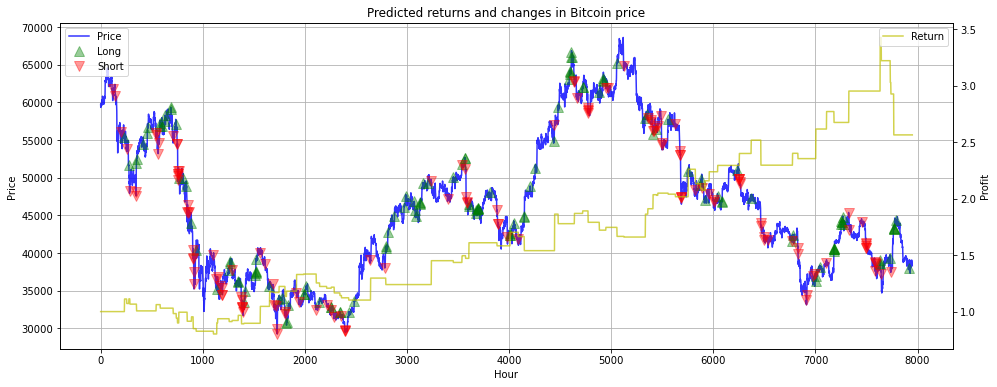

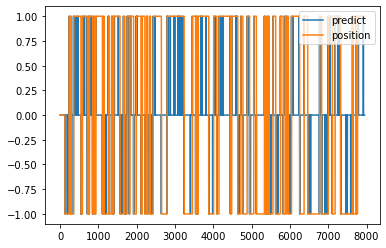

Porfit per trade: 0.0008102873446789511
Enter count     : 674
Precision       : 0.5044510385756676
Net Worth       : 1.546133670313613
P/L             : 1.1709899283518137
Annual Return   : 0.6022319929440144
Max Drawdown    : 0.2944452897095705
Turnover        : 0.0433958228846246


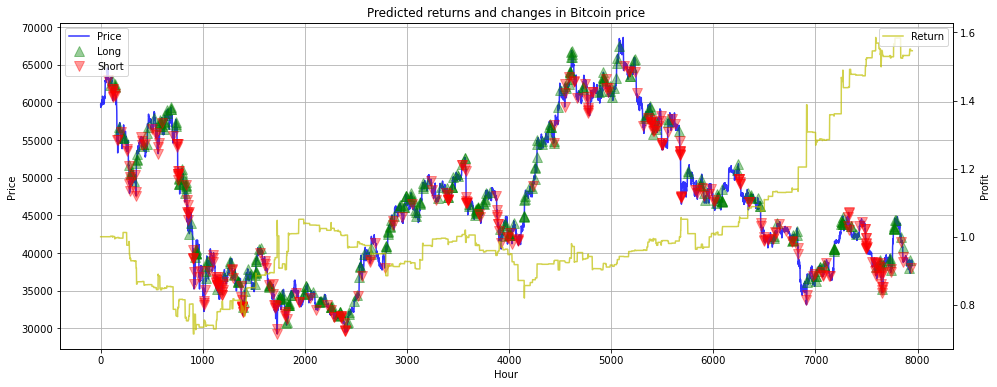

In [21]:
plots('trend_fix')

Porfit per trade: 0.004753468012986722
Enter count     : 433
Precision       : 0.5011547344110855
Net Worth       : 3.0582516496232506
P/L             : 1.3314738291211892
Annual Return   : 2.269673269222013
Max Drawdown    : 0.38291467218568215
Turnover        : 0.10908404630095622


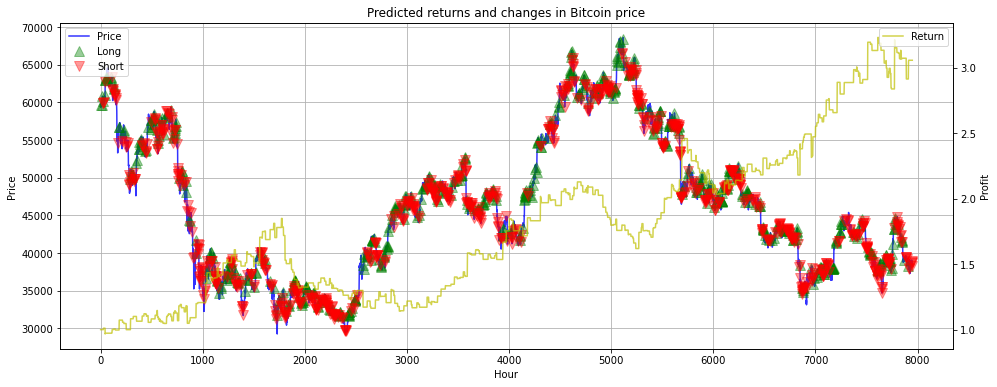

Porfit per trade: 0.00017964250228392294
Enter count     : 3192
Precision       : 0.5087719298245614
Net Worth       : 1.573418867290282
P/L             : 1.0821208389449068
Annual Return   : 0.6323198989756886
Max Drawdown    : 0.2411606906551275
Turnover        : 0.21252264780103486


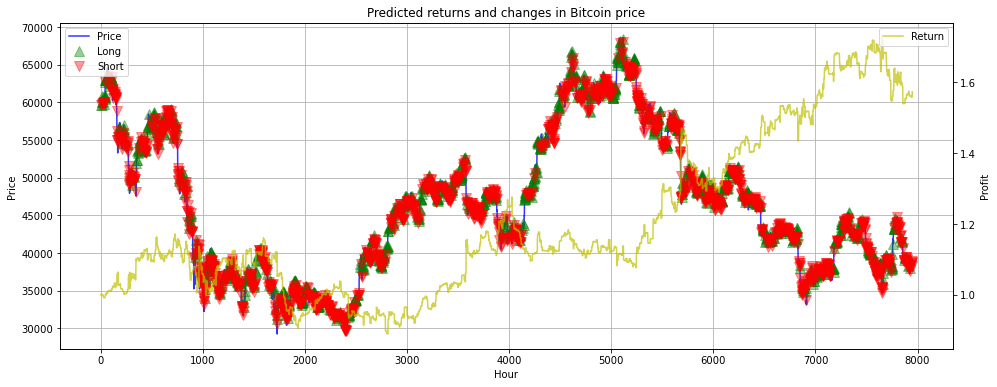

In [9]:
plots('trend_std')

Porfit per trade: 0.0028161177502921447
Enter count     : 42
Precision       : 0.6904761904761905
Net Worth       : 1.11827694551227
P/L             : 0.5117849610752595
Annual Return   : 0.13042623900899872
Max Drawdown    : 0.5021845668350684
Turnover        : 0.010694514343231001


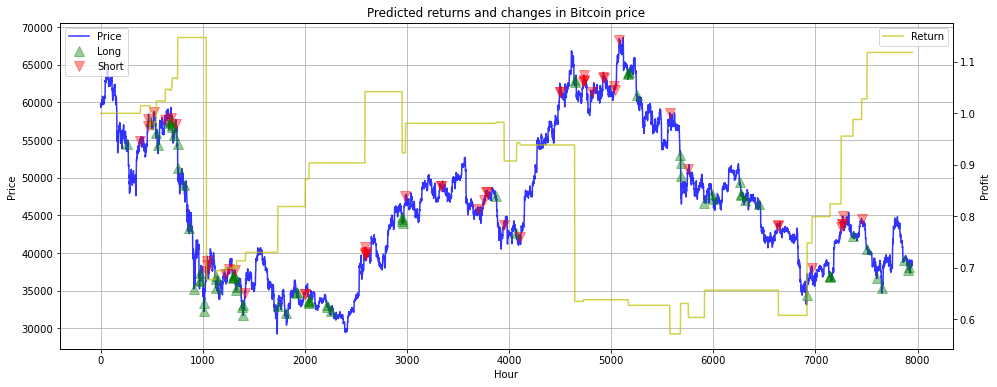

Porfit per trade: 3.302501170093637e-06
Enter count     : 411
Precision       : 0.5206812652068127
Net Worth       : 1.0013573279809085
P/L             : 0.9508748450675646
Annual Return   : 0.0014967513988869998
Max Drawdown    : 0.2521711069253988
Turnover        : 0.023860090563592146


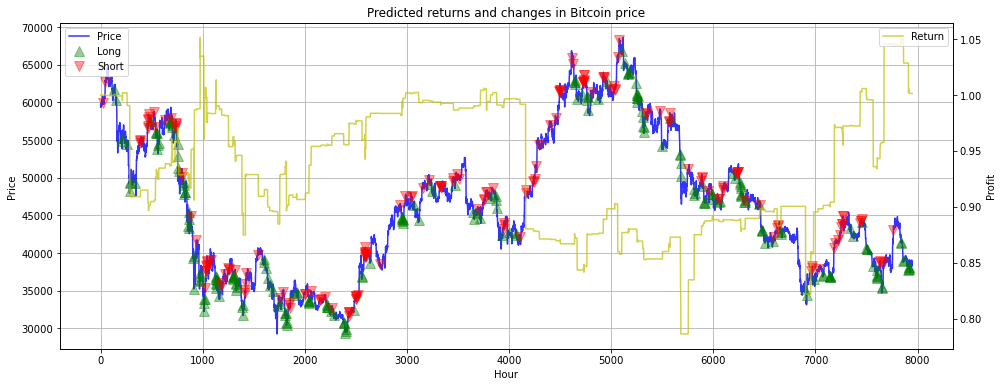

In [10]:
plots('reversal_fix')

Porfit per trade: 0.001318950990090644
Enter count     : 158
Precision       : 0.5949367088607594
Net Worth       : 1.2083942564343217
P/L             : 0.7748091652359124
Annual Return   : 0.22980031298648773
Max Drawdown    : 0.5041334911947523
Turnover        : 0.0398842476094615


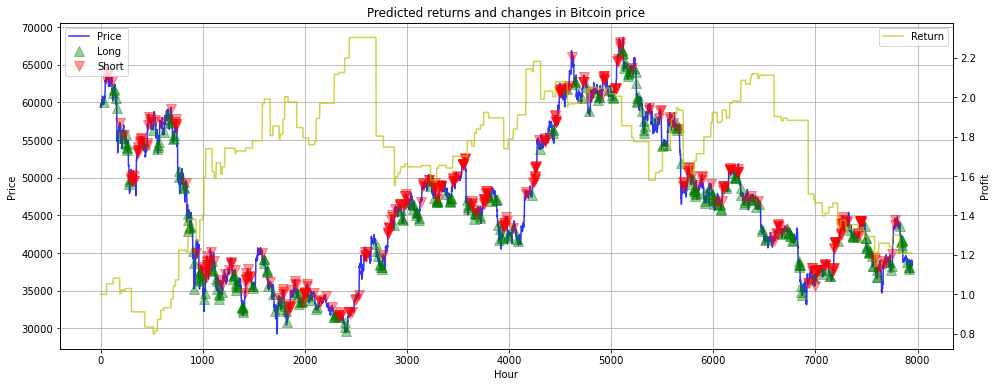

Porfit per trade: -0.00015300985529252277
Enter count     : 1630
Precision       : 0.5319018404907976
Net Worth       : 0.7505939358731879
P/L             : 0.8334495446281807
Annual Return   : -0.27502481391627315
Max Drawdown    : 0.4652989116436816
Turnover        : 0.09709235071661593


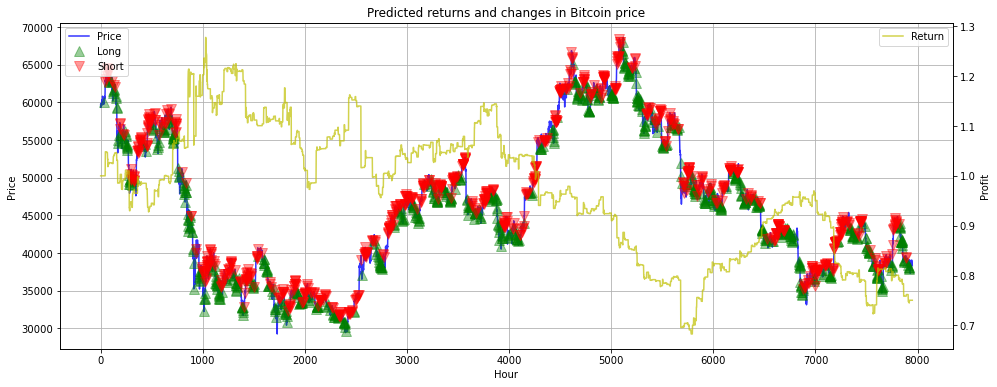

In [11]:
plots('reversal_std')

Porfit per trade: 0.008503095203580594
Enter count     : 322
Precision       : 0.6242236024844721
Net Worth       : 3.7379966555529514
P/L             : 0.8309454917585434
Annual Return   : 3.01924102500552
Max Drawdown    : 0.46033181762880265
Turnover        : 0.08115249119275289


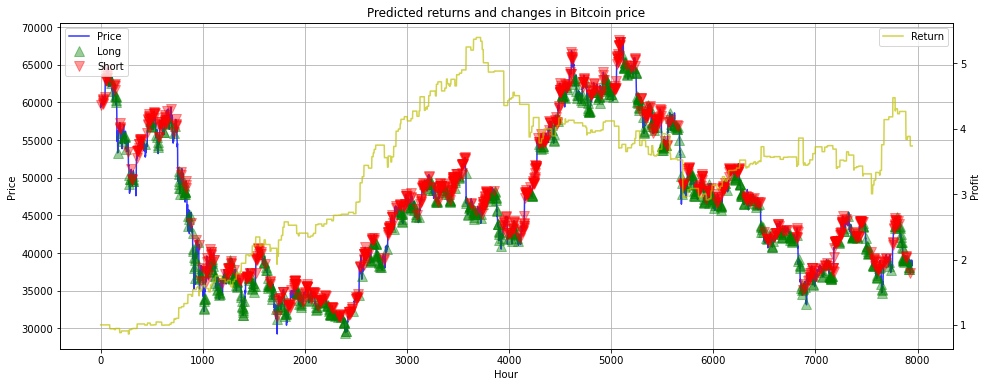

Porfit per trade: 0.0001008653386190235
Enter count     : 3611
Precision       : 0.5314317363611188
Net Worth       : 1.364224737753294
P/L             : 0.9439584999411824
Annual Return   : 0.40163755069471985
Max Drawdown    : 0.22650024573270094
Turnover        : 0.20753648750780213


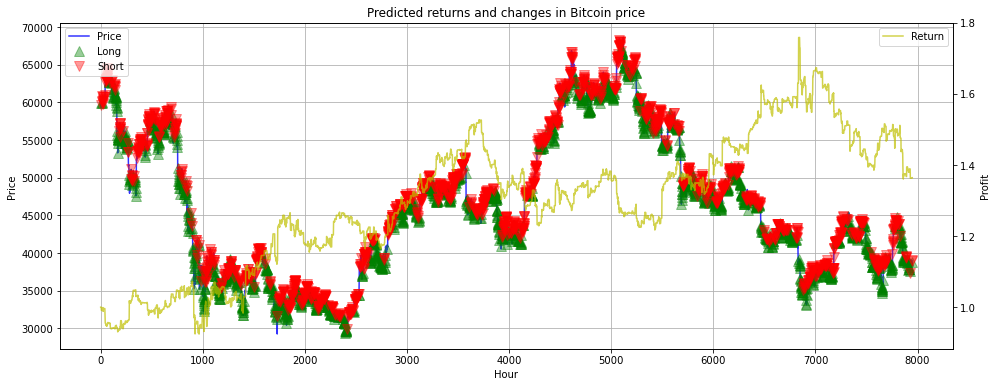

In [12]:
plots('reversal_cg')